# Telco Customer Churn

**Abstract**

**Customer Churn** refers to the loss of customers. That is, if a customer or a client stops taking services from a company, it is said that he/she has churned.

Churn is intimately connected to a company’s performance. The more one learns about buyers’ behavior, the more money one can make. Analyzing customer churn also aids in finding and improving the shortcomings of services provided by the company.

**Content**

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.ticker as mtick

In [ ]:
# load the data
data_telco = pd.read_csv("https://raw.githubusercontent.com/Rohitkanithi/AutoML-repo/main/telco-customer-churn.csv")
data_telco.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

At first glance, we have many categorical variables and some numerical ones. CustomerID is a unique identifier which means it will be not be a useful feature. Lets inspect all the features.

In [ ]:
data_telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data_telco.columns.to_series().groupby(data_telco.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

It seems we have many categorical variables such as gender, SeniorCitizen, Partner and some numerical features like, TotalCharges, MonthlyCharges. Finally the categorical variable Churn is the one that matters most, whether or not the customer has churned. We need to inspect the datatypes for each variable

In [ ]:
# created a copy for removing 1%, 5%, 10% of data randomly and imputing back with few methods
data_random = data_telco.copy()

In [ ]:
data_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#summary of the dataset
data_telco.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

* I need to visualize the distributions for all numerical variables to check out the distributions.

In [ ]:
# Checking any missings values exists in the dataset
data_telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* There are no missing values in the dataset but need to analyze more to find any kind of irrevelant data is available in the dataset.

In [ ]:
# Checking any empty cells exists in the dataset
len(data_telco.loc[data_telco["TotalCharges"]==" "])

11

* There are 11 missing values in the dataset which are having spaces in the TotalCharges column

In [ ]:
# Finding the empty rows in the dataset in specific column
data_telco.loc[data_telco["TotalCharges"]==" "]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

In [ ]:
# Converting "TotalCharges" to a numerical data type
data_telco['TotalCharges'] = pd.to_numeric(data_telco['TotalCharges'], errors='coerce')

In [ ]:
# Replaced with NaN values and displaying the updated rows
data_telco[data_telco['TotalCharges'].isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [ ]:
# Updated the NaN values with mean value of the respective column
data_telco['TotalCharges'] = data_telco['TotalCharges'].fillna(data_telco['TotalCharges'].mean())

<Figure size 4500x2000 with 0 Axes>

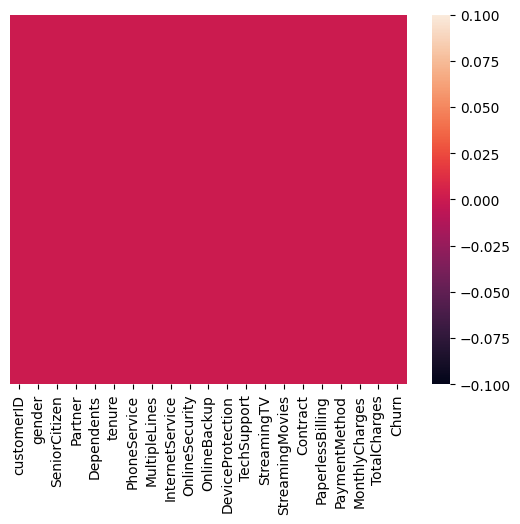

<Figure size 4500x2000 with 0 Axes>

In [ ]:
# Visaulizing through heatmap whether any missing values available in the dataset
sns.heatmap(data_telco.isnull(),yticklabels=False)
plt.figure(figsize=(45,20))

In [ ]:
#Re-cheching the missing value columns
len(data_telco.loc[data_telco['TotalCharges']==" "])

0

In [ ]:
cat_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
number_list = ['tenure','MonthlyCharges', 'TotalCharges']

for col in cat_list: #Checking Data
    print(col)
    print(data_telco[col].value_counts())
    print("-------------------------------------------------")

gender
Male      3555
Female    3488
Name: gender, dtype: int64
-------------------------------------------------
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
-------------------------------------------------
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
-------------------------------------------------
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
-------------------------------------------------
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
-------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------------------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-------------------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet serv

## Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Exploring the response variable, the Customers who churn

* From the barplot below, it is depicted those who intend to leave a serive/product or even cut off their relationship with the Telco company are about 2000 customers compared those who are willing to continue using the company's products. So about 28% of the customers from this dataset are about to churn.

No     5174
Yes    1869
Name: Churn, dtype: int64

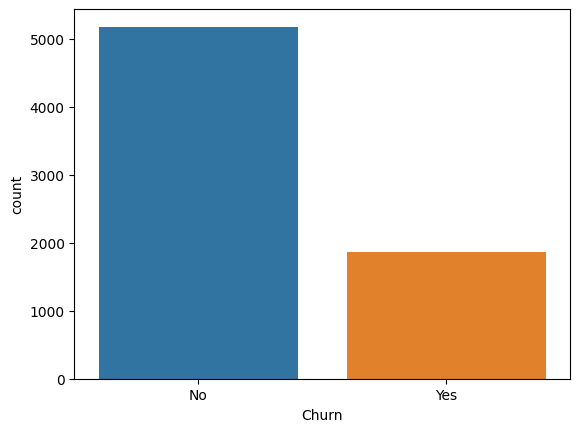

In [ ]:
sns.countplot(x = "Churn", data = data_telco)
data_telco.loc[:, 'Churn'].value_counts()

In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data_telco['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data_telco['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

*   26.6 % of customers switched to another firm.
*   Customers are 49.5 % female and 50.5 % male.

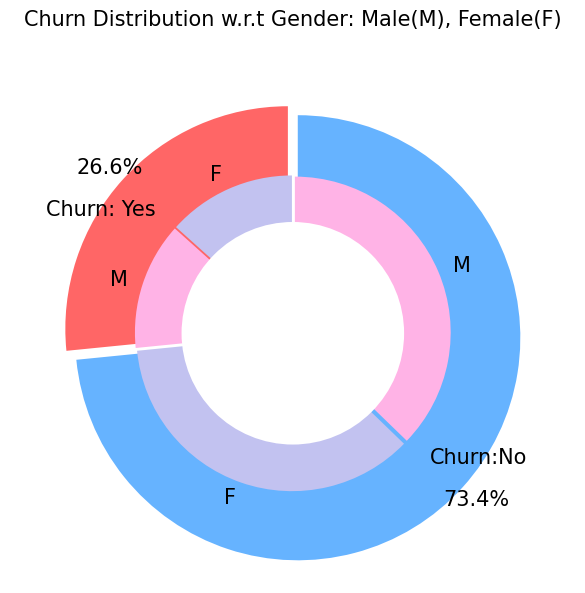

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

* There is negligible difference in customer percentage/ count who changed the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [ ]:
fig = px.histogram(data_telco, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [ ]:
labels = data_telco['PaymentMethod'].unique()
values = data_telco['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [ ]:
fig = px.histogram(data_telco, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data_telco, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers without dependents are more likely to churn

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data_telco, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers that doesn't have partners are more likely to churn

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data_telco, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* It can be observed that the fraction of senior citizen is very less.
Most of the senior citizens churn.

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(data_telco, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Most customers churn in the absence of online security,

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data_telco, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers with Paperless Billing are most likely to churn.

In [ ]:
fig = px.histogram(data_telco, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers with no TechSupport are most likely to migrate to another service provider.

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(data_telco, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

<ipython-input-33-ddaa6e1271dc>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-33-ddaa6e1271dc>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




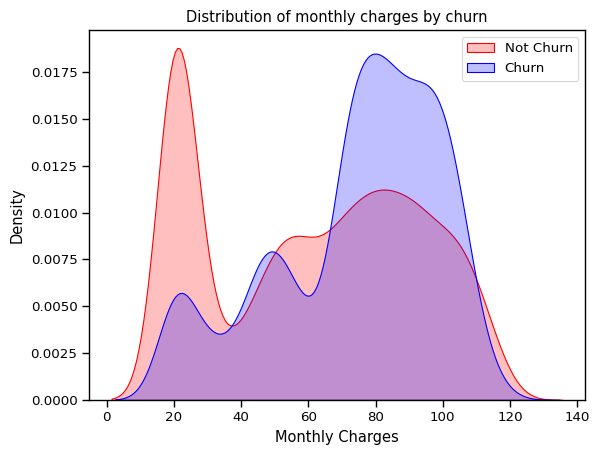

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data_telco.MonthlyCharges[(data_telco["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data_telco.MonthlyCharges[(data_telco["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');


<ipython-input-34-7c552d9febf5>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-34-7c552d9febf5>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




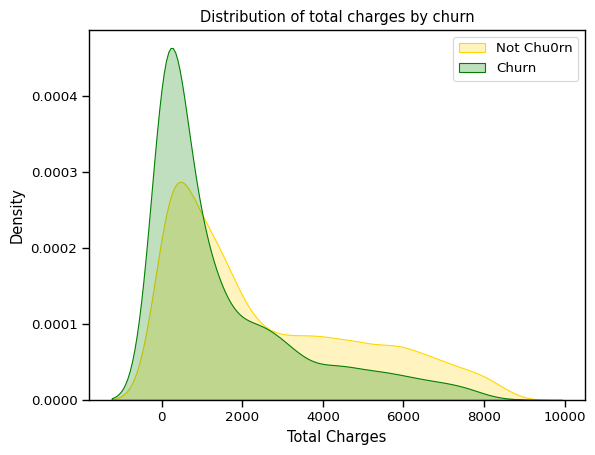

In [ ]:
ax = sns.kdeplot(data_telco.TotalCharges[(data_telco["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(data_telco.TotalCharges[(data_telco["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [ ]:
fig = px.box(data_telco, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()


* New customers are more likely to churn

# Exploring the numerical features

* I would like to explore one by one all the numerical variables, with histograms and barplots, to understand their data and some hidden information coming from them.

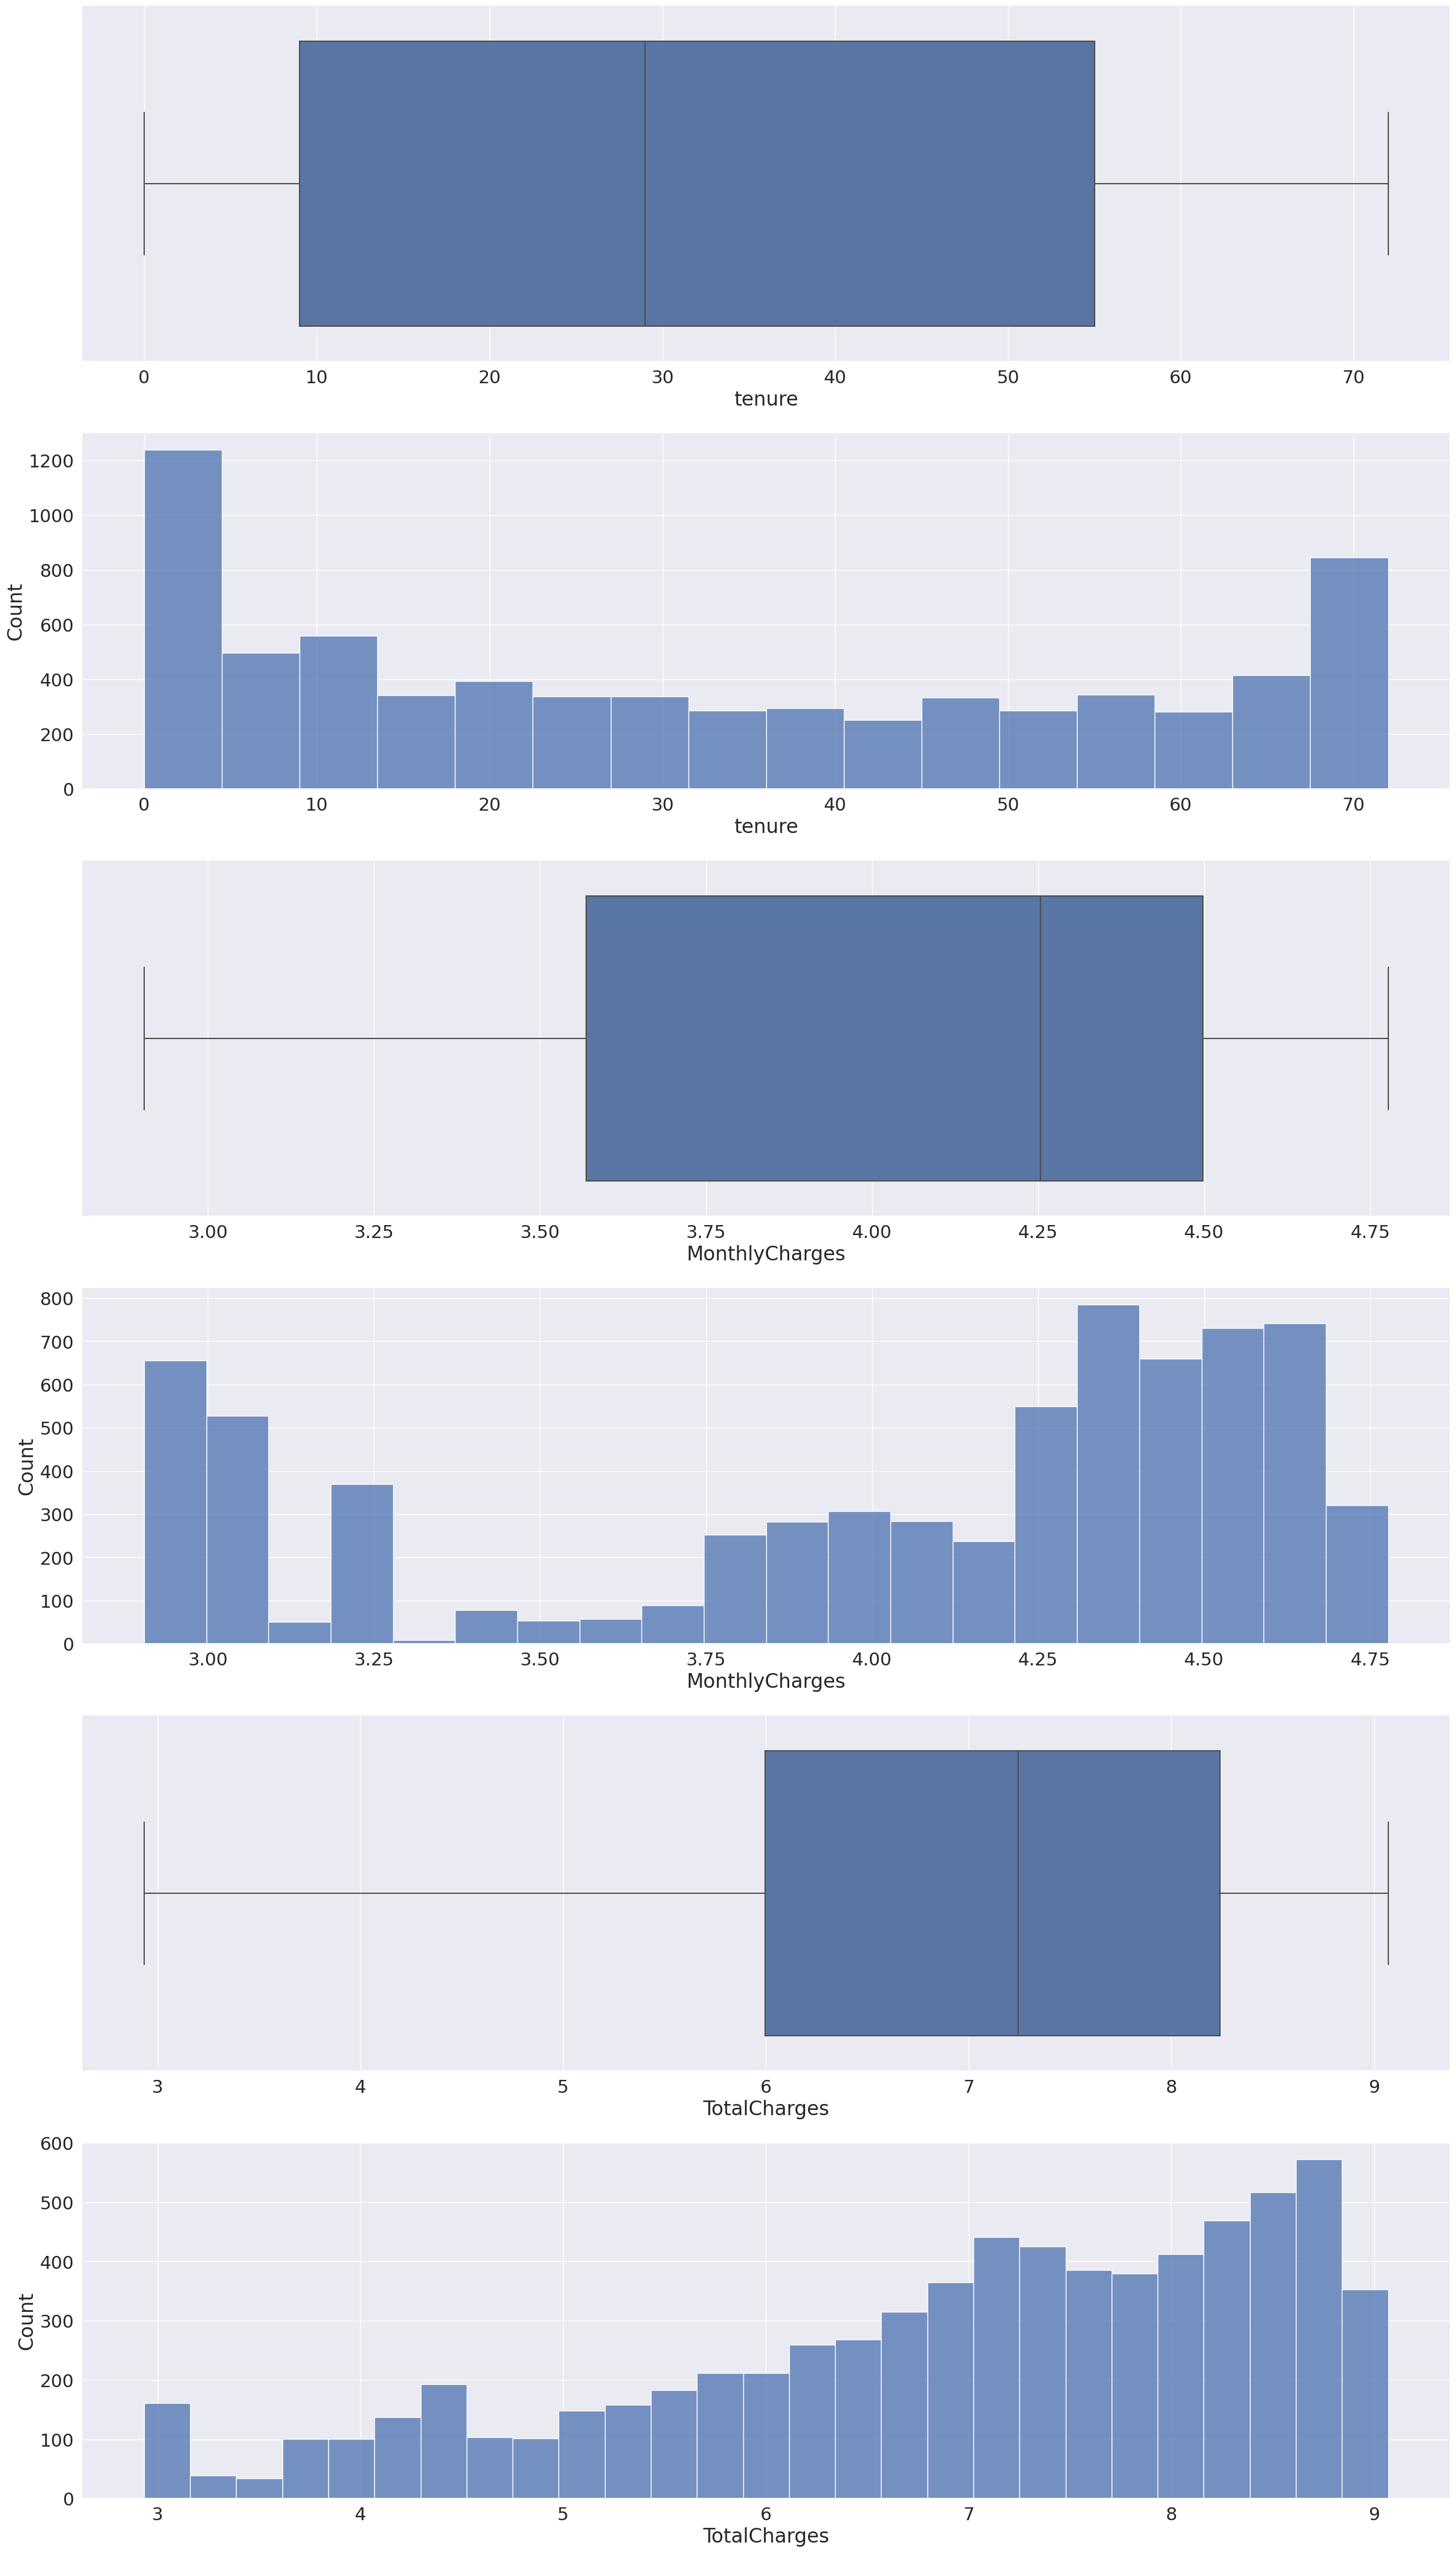

In [ ]:
fig, ax = plt.subplots(6, figsize=(30, 55))
sns.set(font_scale=2)

g=sns.boxplot(data=data_telco, x="tenure", ax=ax[0])
g=sns.histplot(data=data_telco, x="tenure", ax=ax[1])


g=sns.boxplot(data=data_telco, x="MonthlyCharges", ax=ax[2])
g=sns.histplot(data=data_telco, x="MonthlyCharges", ax=ax[3])


g=sns.boxplot(data=data_telco, x="TotalCharges", ax=ax[4])
g=sns.histplot(data=data_telco, x="TotalCharges", ax=ax[5])

* From the charts above, the visualizations of numerical features with customers who churn

* For both numerical variables, tenure and TotalCharges the Churn follows the same pattern, many customers leave very early and with small total charges respectively and compared to the rest of their respective populations.

* The opposite happens with the MonthlyCharges, customers who Churn, will leave the company when the monthly charges are rising above 80 dollars.

* We see we have many customers who stay less than 10 months in the company. However, they is a small spike in customers who are loyal enough to stay up to 72 months.

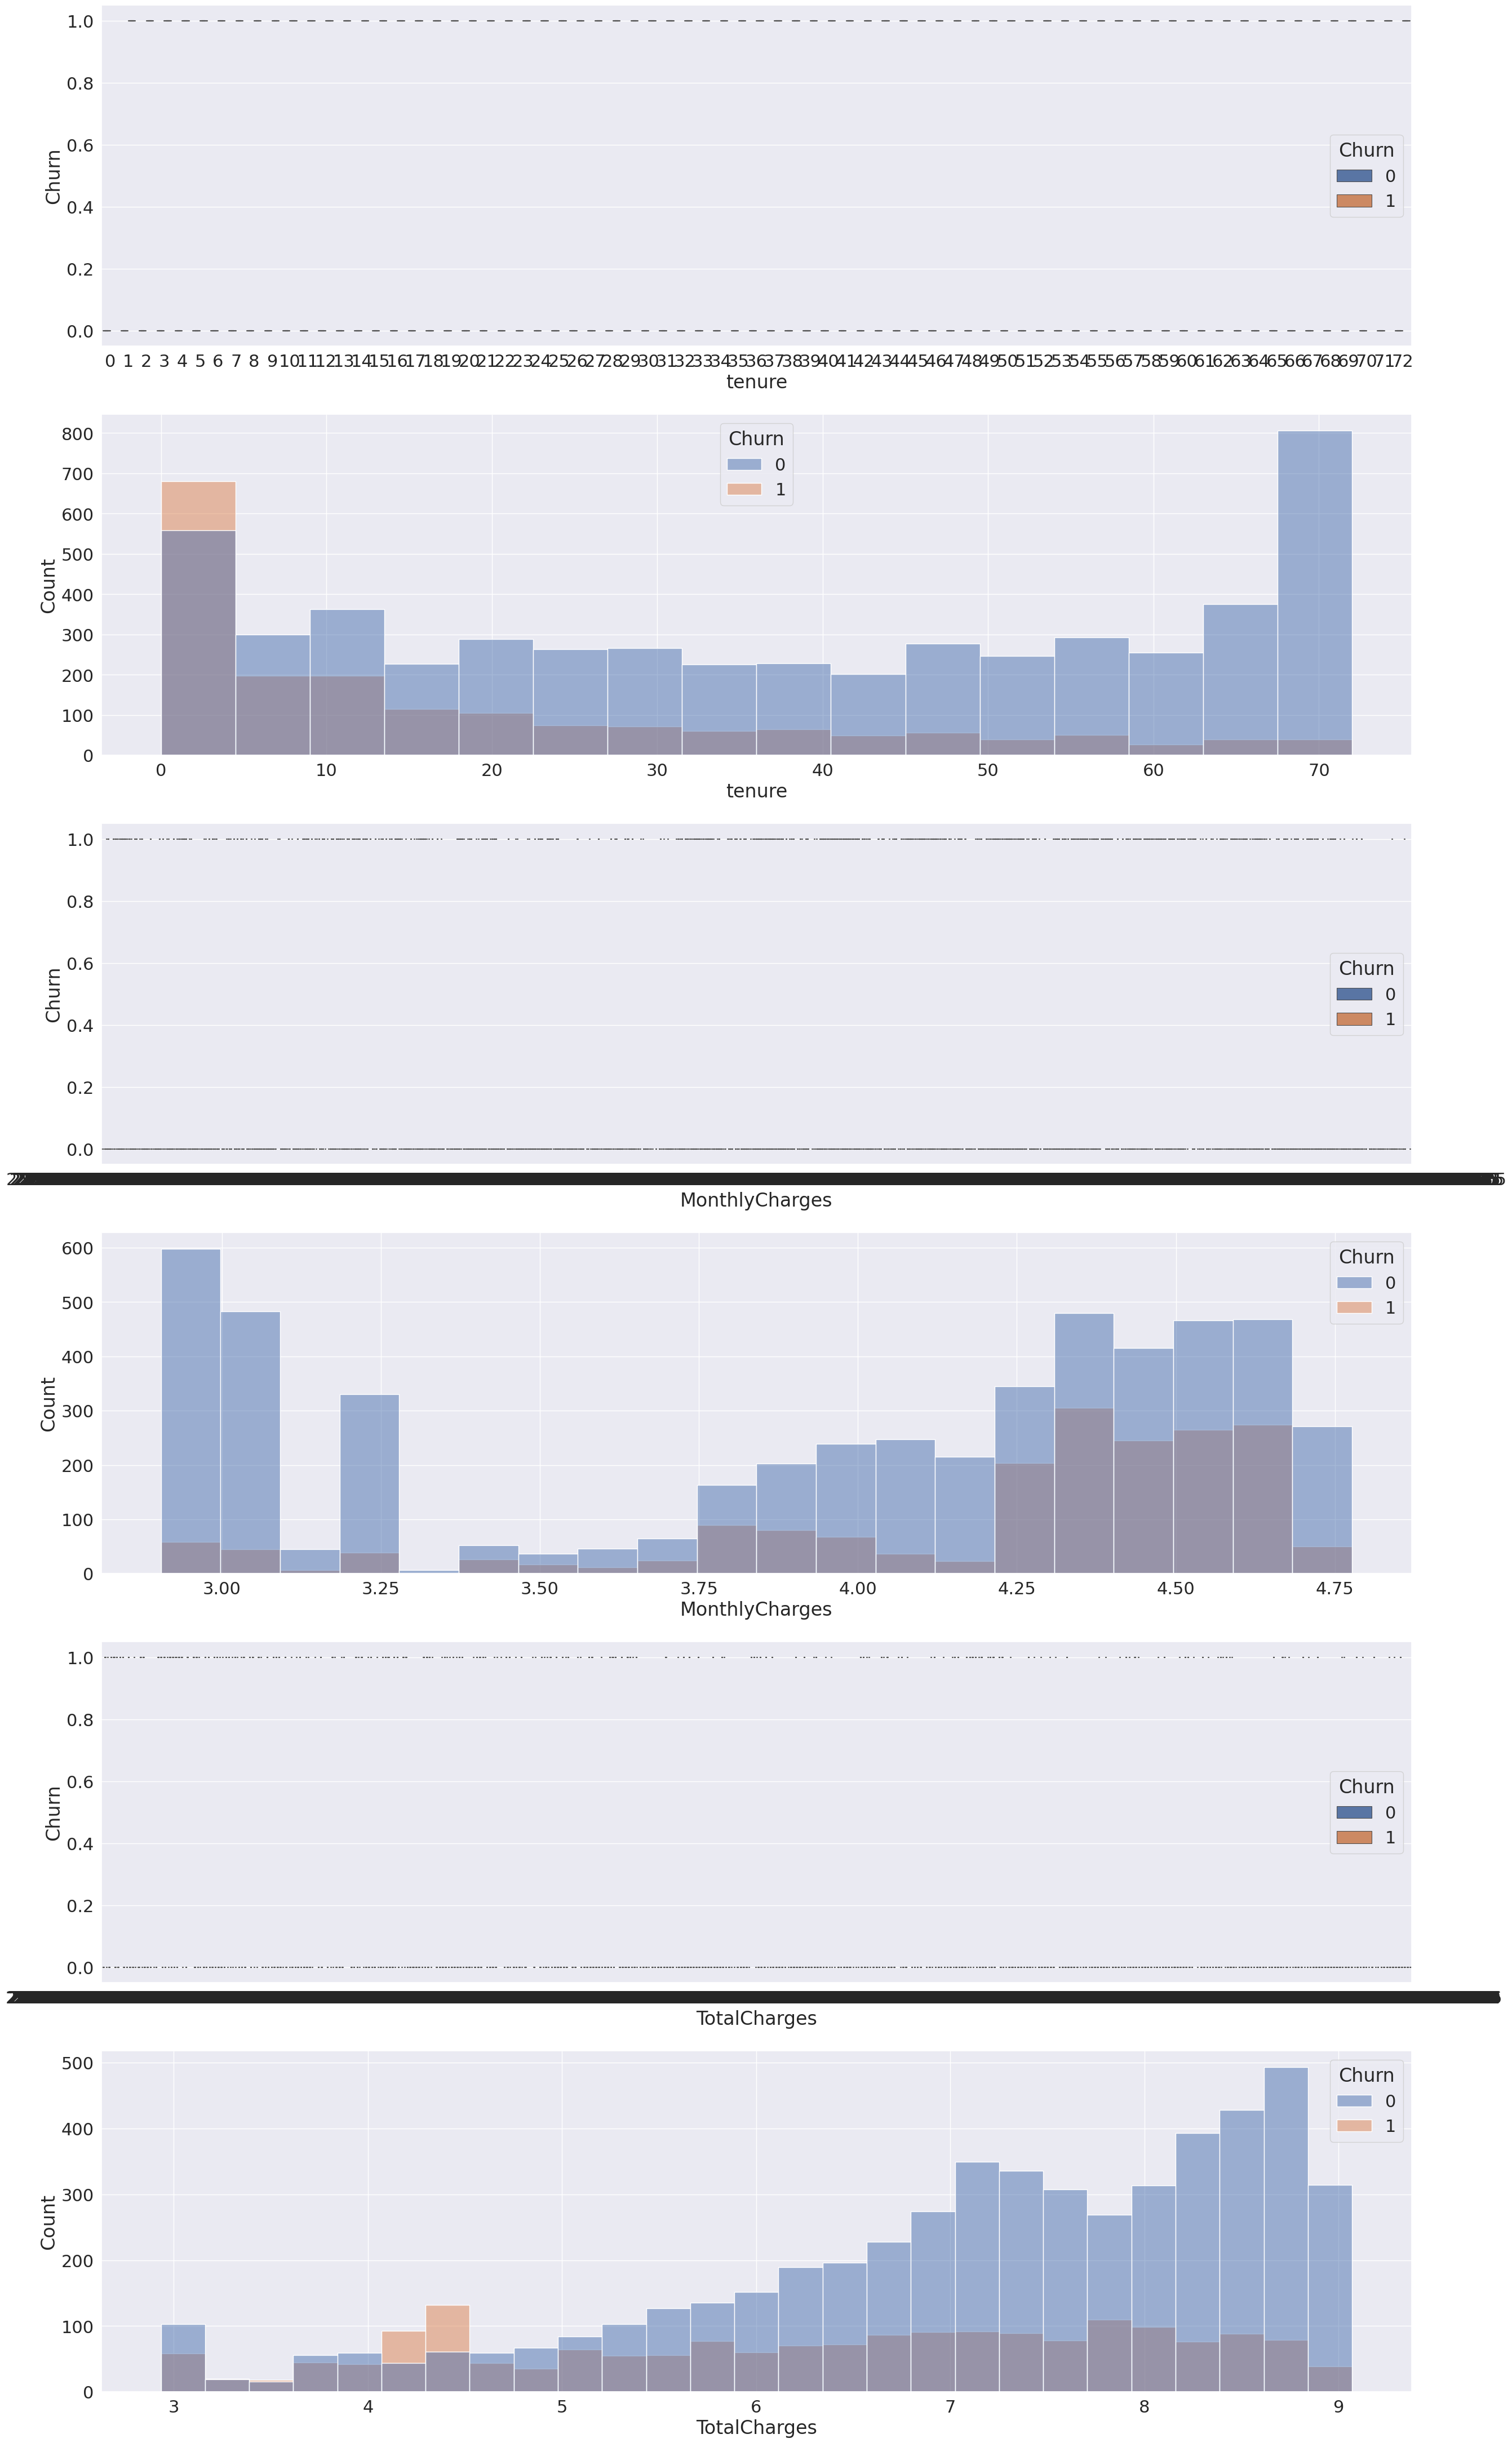

In [ ]:
fig, ax = plt.subplots(6, figsize=(30, 55))
sns.set(font_scale=2)

g=sns.boxplot(data=data_telco, x="tenure", y="Churn", ax=ax[0], hue="Churn")
g=sns.histplot(data=data_telco, x="tenure", ax=ax[1], hue="Churn")


g=sns.boxplot(data=data_telco, x="MonthlyCharges", y="Churn", ax=ax[2], hue="Churn")
g=sns.histplot(data=data_telco, x="MonthlyCharges", ax=ax[3], hue="Churn")


g=sns.boxplot(data=data_telco, x="TotalCharges", y="Churn", ax=ax[4], hue="Churn")
g=sns.histplot(data=data_telco, x="TotalCharges", ax=ax[5], hue="Churn")

* The charts above, the visualizations of numerical features with customers who churn

* There are outliers in the TotalCharges column.

* MonthlyCharges and tenure column outliers are not detected and IQR was low.

* For both numerical variables, tenure and TotalCharges the Churn follows the same pattern, many customers leave very early and with small total charges respectively and compared to the rest of their respective populations.

* The opposite happens with the MonthlyCharges, customers who Churn, will leave the company when the monthly charges are rising above 80 dollars.

* Finally all the numerical features have a right skewed distribution.

In [ ]:
#Remove customer IDs column from the data set
data_telco.drop("customerID",inplace=True,axis=1)

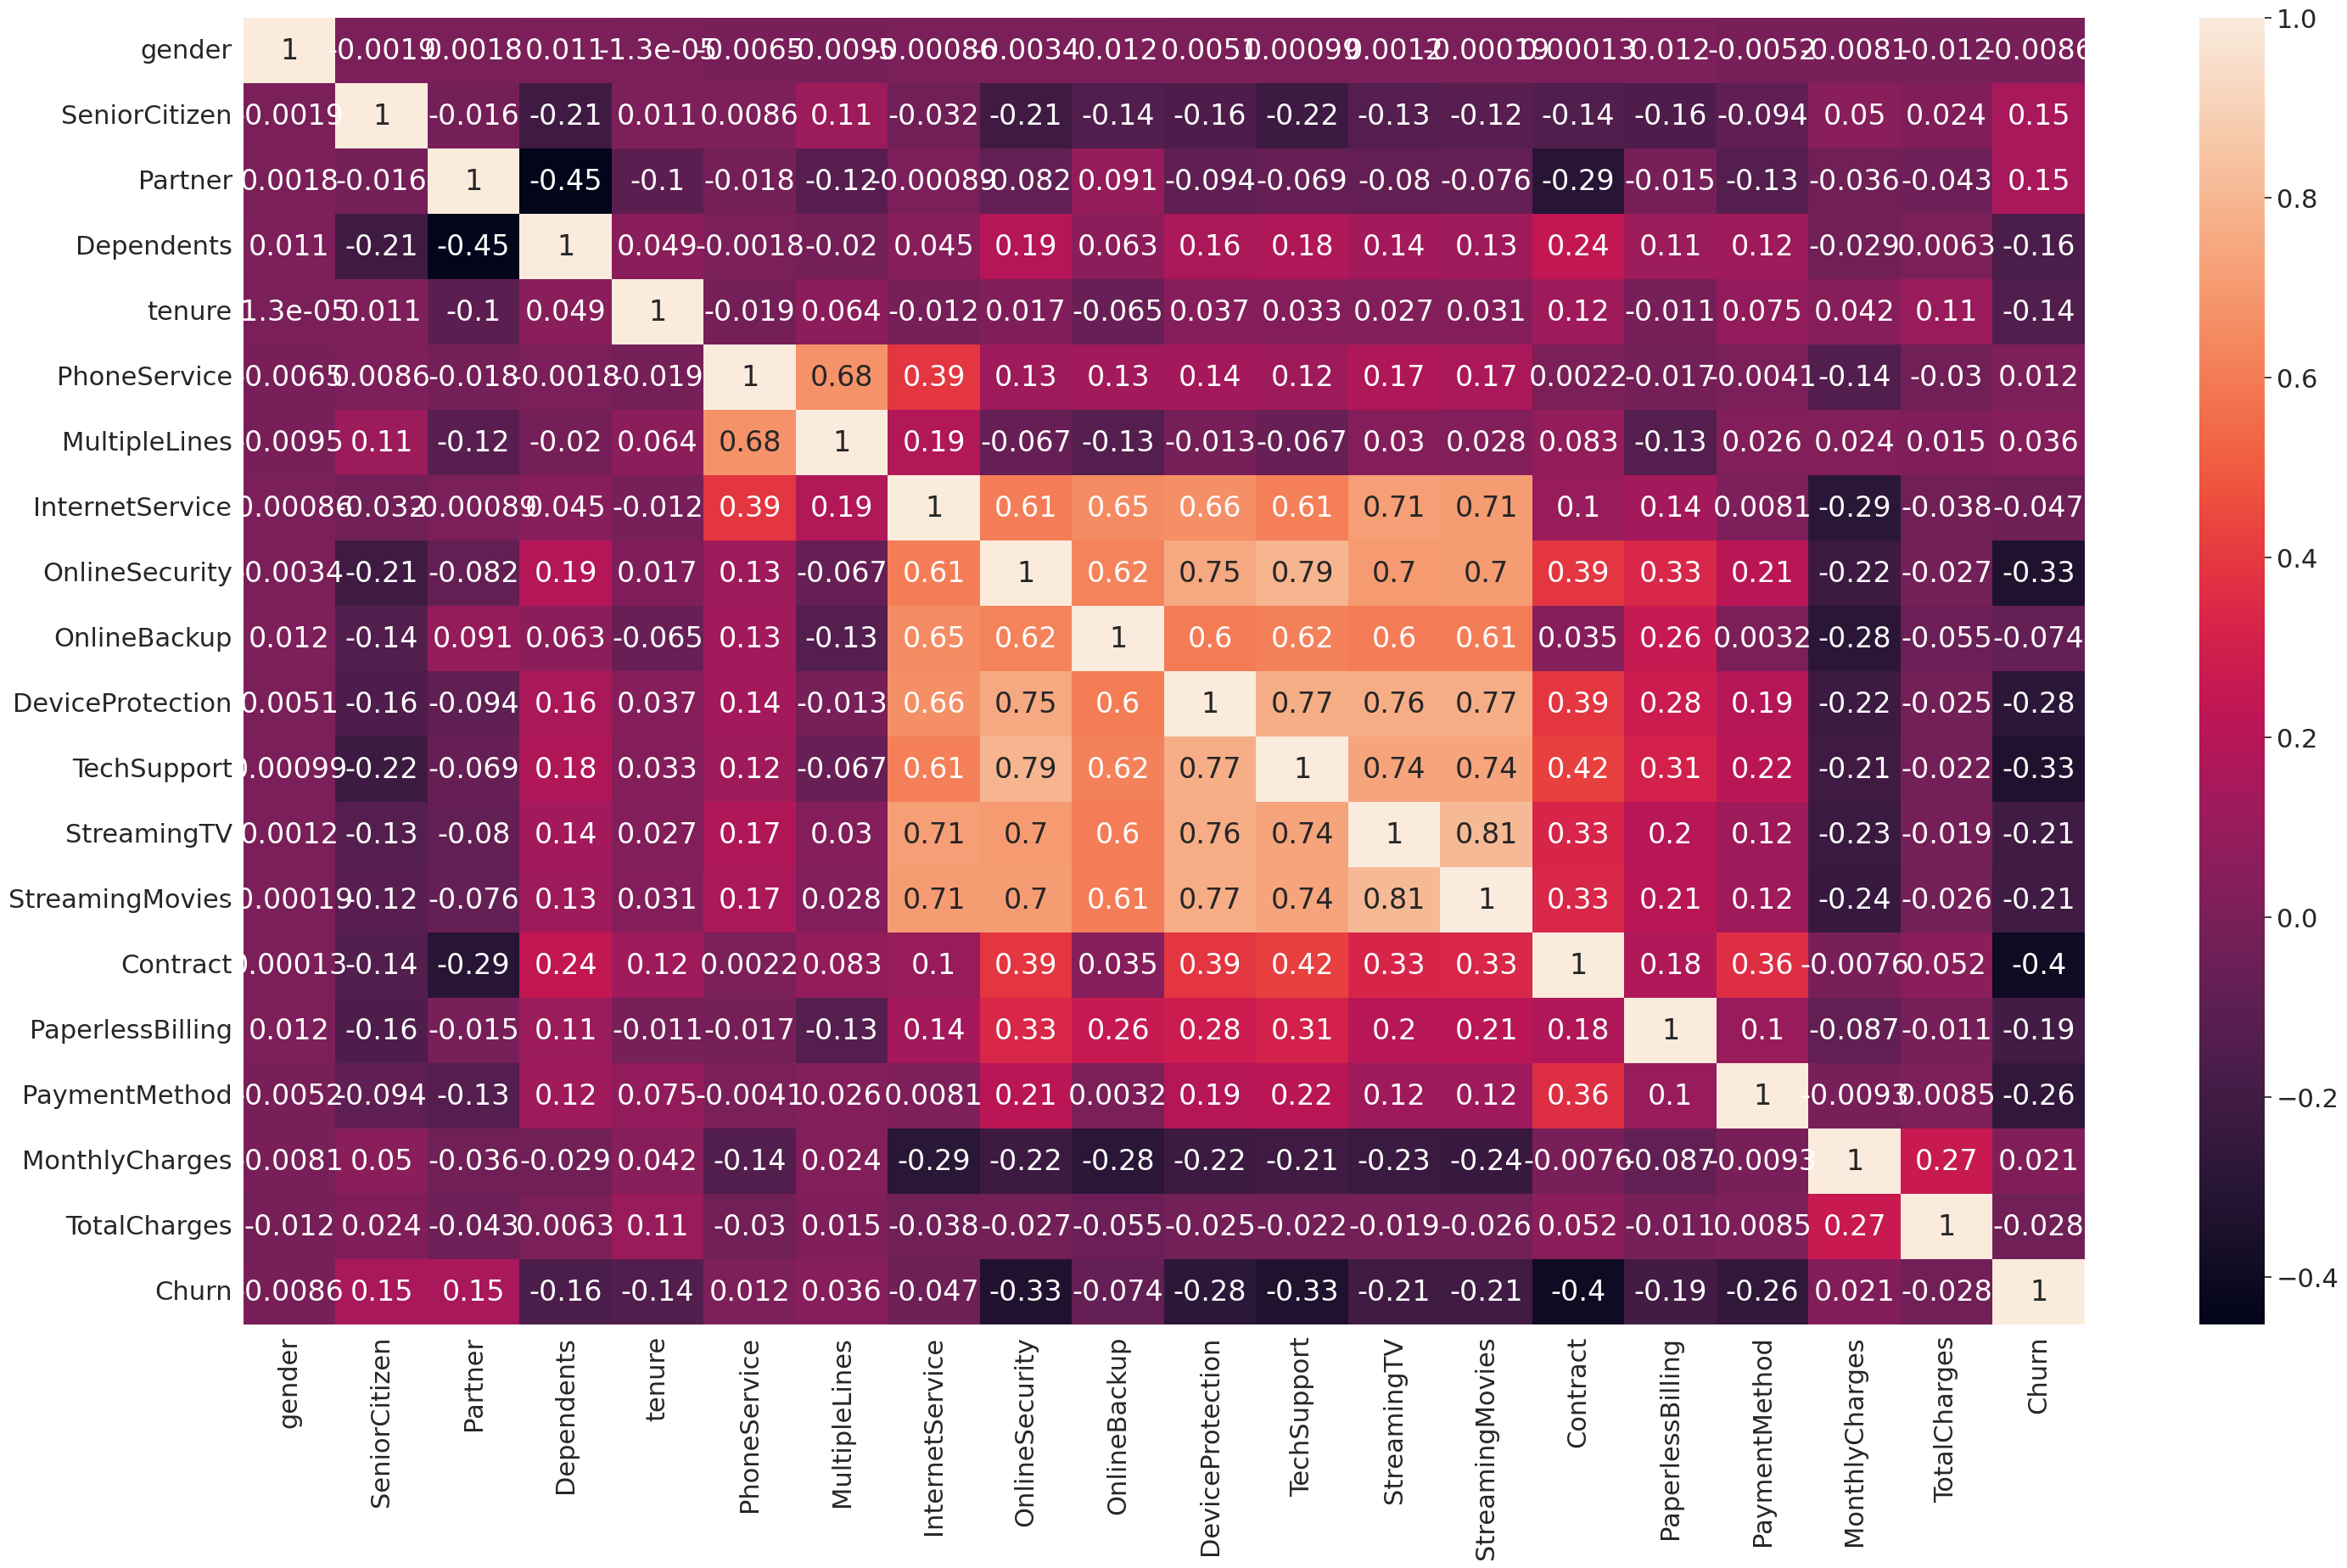

In [ ]:
# plot the correlation
plt.figure(figsize=(35, 20))

corr_plot = data_telco.apply(lambda z: pd.factorize(z)[0]).corr()

p = sns.heatmap(corr_plot, xticklabels=corr_plot.columns, yticklabels=corr_plot.columns, annot=True)

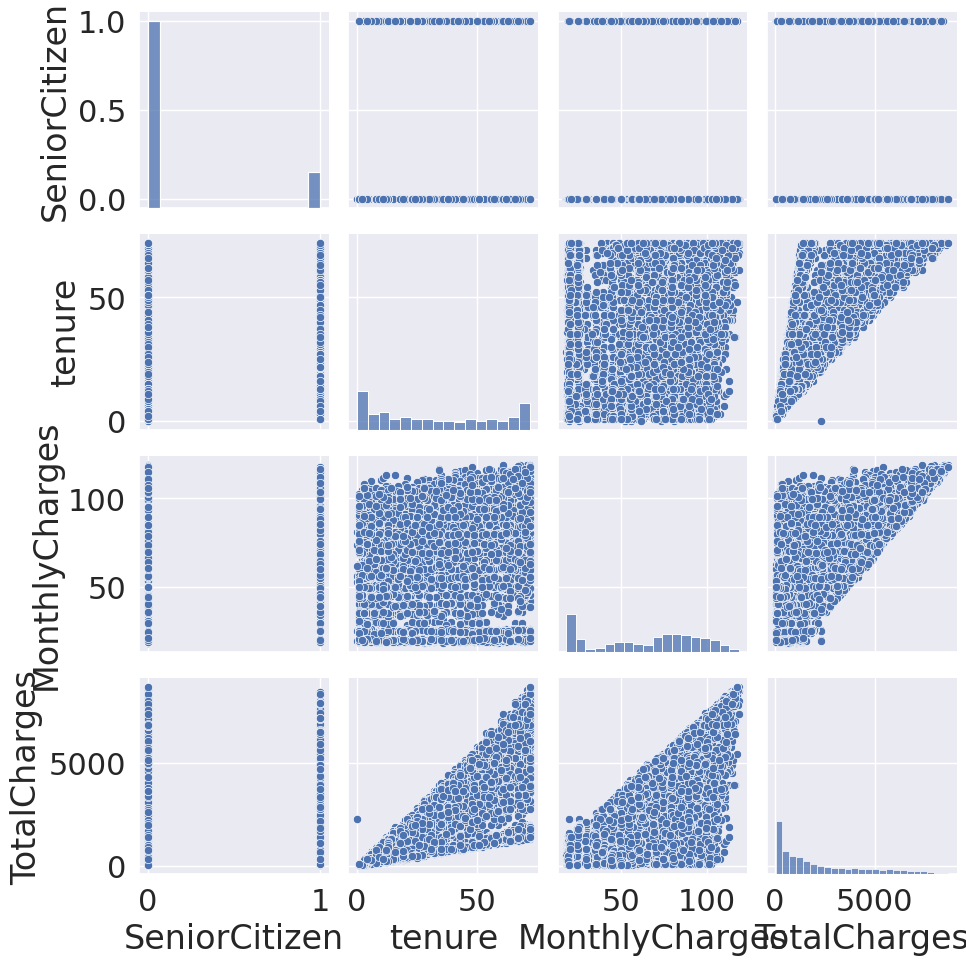

In [ ]:
# All attributes are plotted against each other to see the pattern of distribution
sns.pairplot(data_telco)

<Figure size 500x500 with 0 Axes>

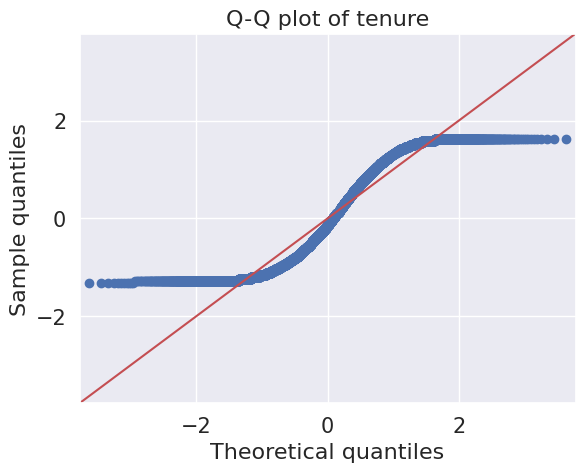

<Figure size 500x500 with 0 Axes>

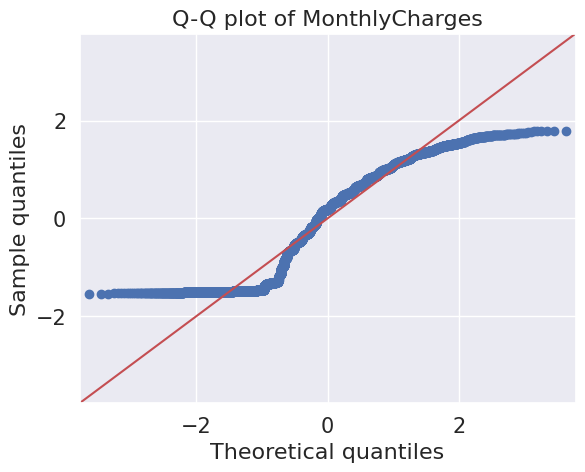

<Figure size 500x500 with 0 Axes>

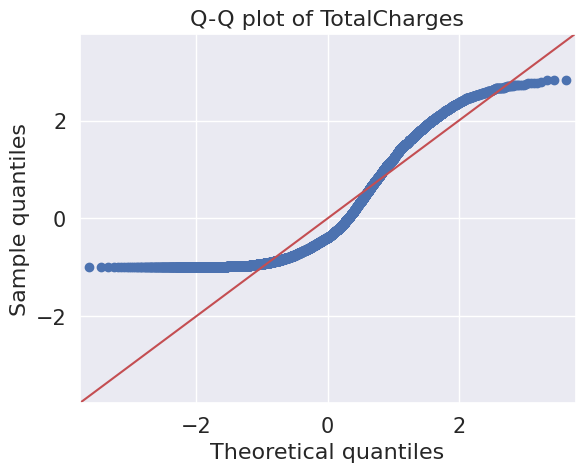

In [ ]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_telco_plot=data_telco[['tenure', 'MonthlyCharges', 'TotalCharges']]
for i in data_telco_plot.columns[:]:
  plt.figure(figsize=(5,5))
  fig=qqplot(data_telco[i],line='45',fit='True')
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel("Theoretical quantiles",fontsize=16)
  plt.ylabel("Sample quantiles",fontsize=16)
  plt.title("Q-Q plot of {}".format(i),fontsize=16)
  plt.grid(True)
  plt.show()

* Looking at the Q-Q plot above, it appears that all independent variables are not following normal distribution, they are not skewed normally, we will verify whether the data is left or right skewed in the following distributions.
* There are few outliers in the predictor variables.

In [ ]:
from scipy.stats import norm

<ipython-input-43-78b7a480146d>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




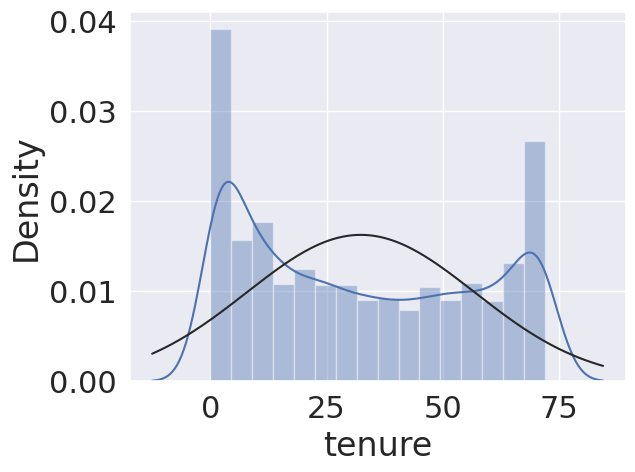

In [ ]:
sns.distplot(data_telco['tenure'], fit=norm);

<ipython-input-44-67c17cfeaea6>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




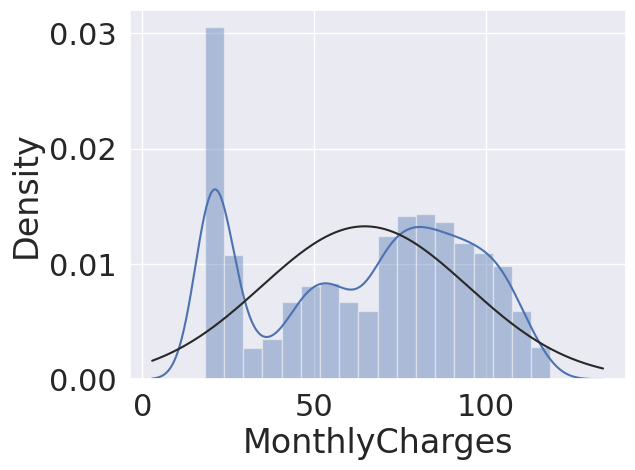

In [ ]:
sns.distplot(data_telco['MonthlyCharges'], fit=norm);

<ipython-input-45-3015fd1a73ac>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




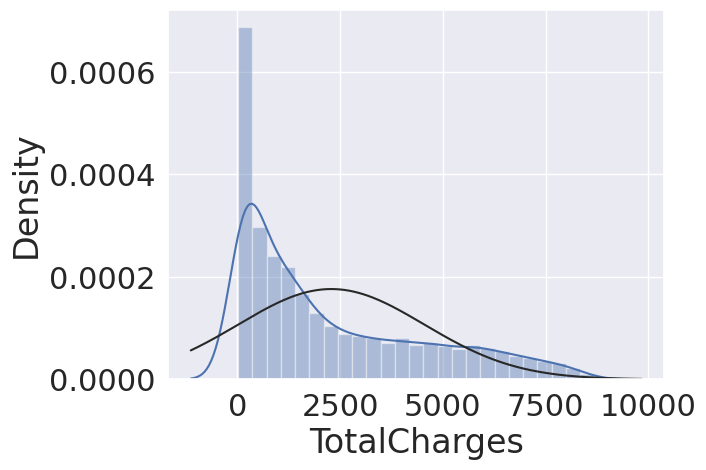

In [ ]:
sns.distplot(data_telco['TotalCharges'], fit=norm);

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % data_telco['tenure'].skew())
print("Kurtosis: %f" % data_telco['tenure'].kurt())

Skewness: 0.239540
Kurtosis: -1.387372


In [ ]:
#skewness and kurtosis
print("Skewness: %f" % data_telco['MonthlyCharges'].skew())
print("Kurtosis: %f" % data_telco['MonthlyCharges'].kurt())

Skewness: -0.220524
Kurtosis: -1.257260


In [ ]:
#skewness and kurtosis
print("Skewness: %f" % data_telco['TotalCharges'].skew())
print("Kurtosis: %f" % data_telco['TotalCharges'].kurt())

Skewness: 0.962394
Kurtosis: -0.227468


* Considering that there are only 4 numeric columns, it is unlikely that this method will be effective in locating the useful independent variable in the dataset.

* As a result, data must be converted to numeric or float datatypes before we can find the useful independent variable, which can also be used for data modeling and prediction for the dataset.

In [ ]:
from scipy import stats

In [ ]:
#applying log transformation
data_telco['MonthlyCharges'] = np.log(data_telco['MonthlyCharges'])

<ipython-input-51-b50a5f405055>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




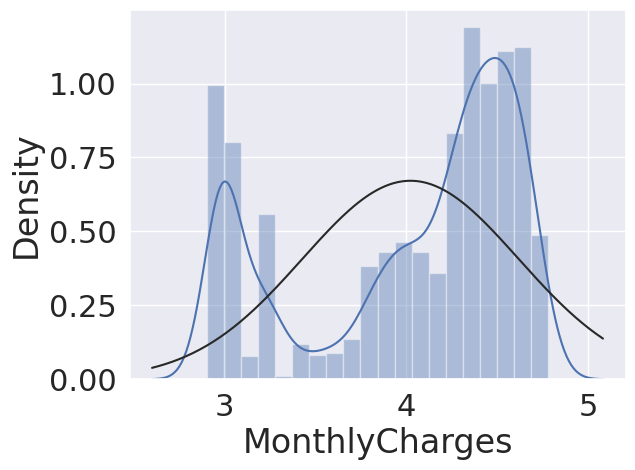

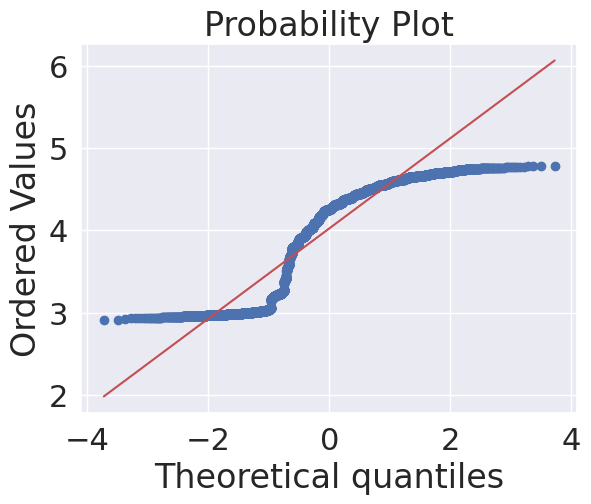

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(data_telco['MonthlyCharges'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_telco['MonthlyCharges'], plot=plt)

In [ ]:
#applying log transformation
data_telco['TotalCharges'] = np.log(data_telco['TotalCharges'])

<ipython-input-53-4a4162d5a003>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




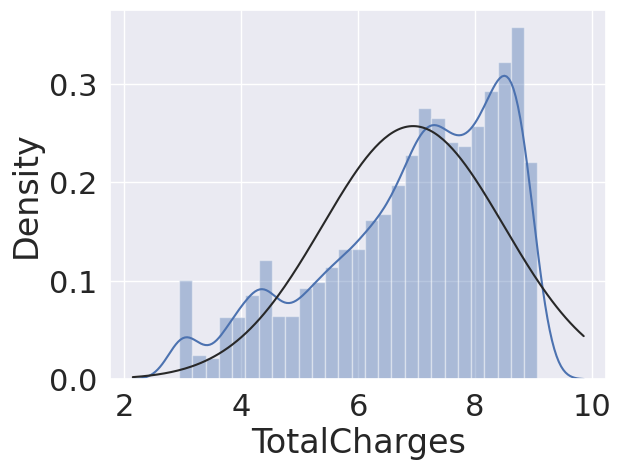

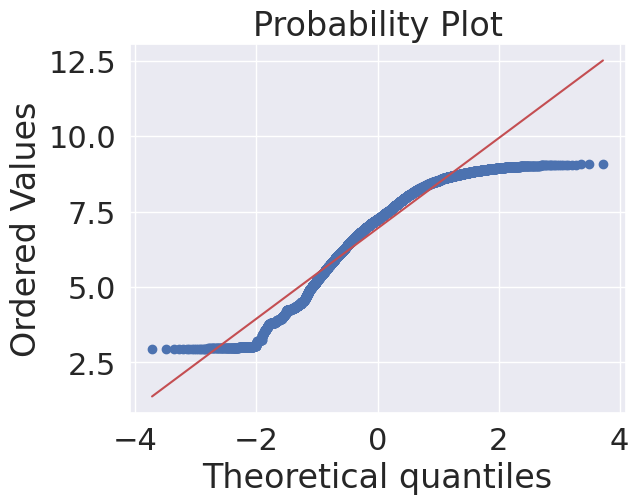

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(data_telco['TotalCharges'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_telco['TotalCharges'], plot=plt)

# Data Preprocessing

In [ ]:
# Import label encoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [ ]:
data_telco_transformed = data_telco

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Transforming Categorical Columns
data_telco_transformed[label_encoding_columns] = data_telco_transformed[label_encoding_columns].apply(label_encoder.fit_transform)

In [ ]:
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
data_telco_transformed = pd.get_dummies(data_telco_transformed, columns = one_hot_encoding_columns,drop_first=True)

In [ ]:
scaler = MinMaxScaler()

min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Encode numeric Columns
data_telco_transformed[min_max_columns] = scaler.fit_transform(data_telco_transformed[min_max_columns])

In [ ]:
# Define the feature variable 'X' and the label/target variable 'y'
X = data_telco_transformed.drop('Churn', axis=1)  # Drop the target variable
y = data_telco_transformed['Churn']

In [ ]:
# Split the data into training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

<ipython-input-117-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-117-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-117-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

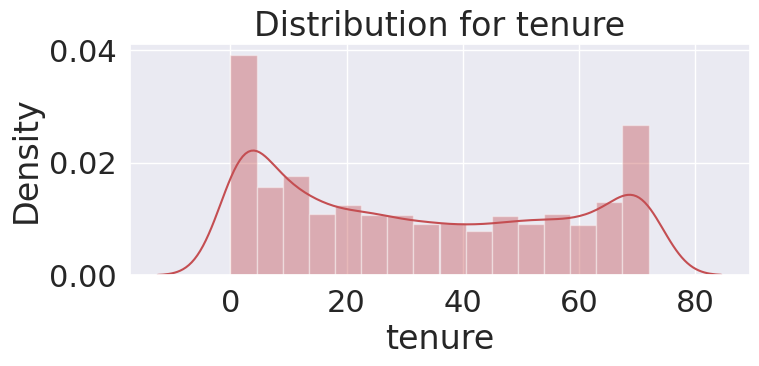

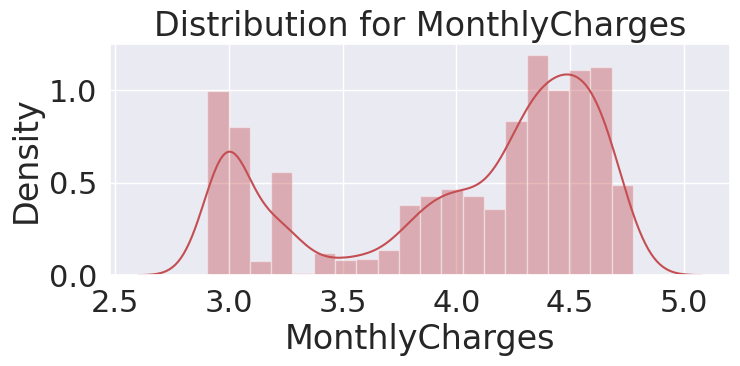

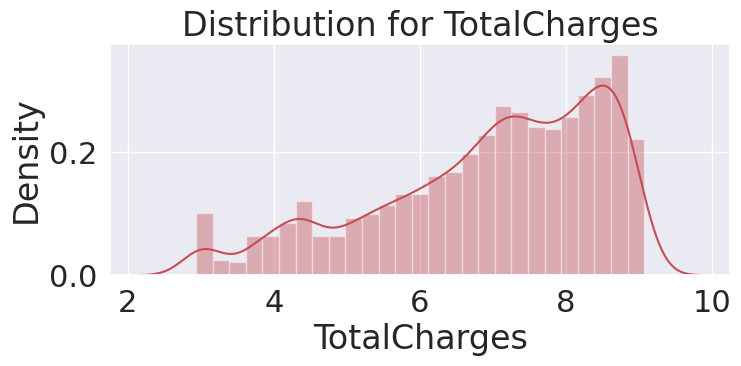

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, data_telco)


* Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

<ipython-input-117-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-117-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-117-8c8257b32bab>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

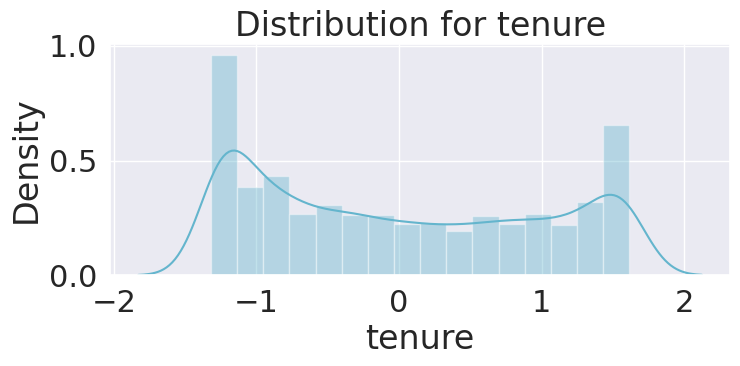

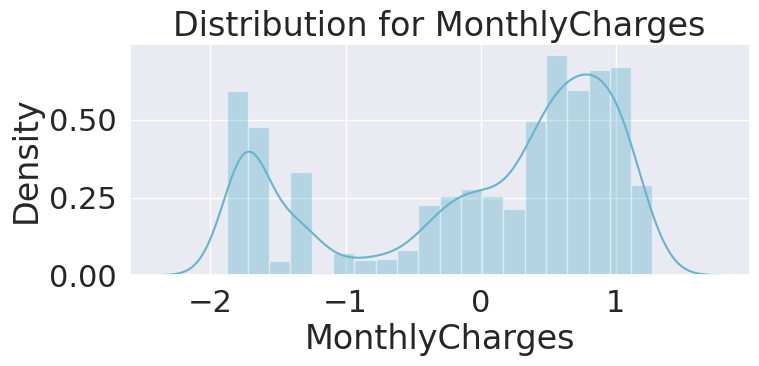

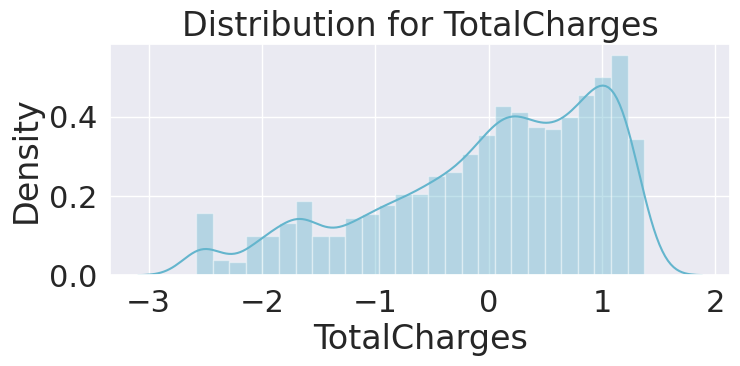

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_std = pd.DataFrame(StandardScaler().fit_transform(data_telco[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

# Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_mc = data_telco_transformed[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_mc.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_mc.values, i)
                          for i in range(len(X_mc.columns))]

print(vif_data)

            feature        VIF
0            gender   1.905842
1     SeniorCitizen   1.320745
2           Partner   2.822225
3        Dependents   1.928833
4            tenure  11.573492
5      PhoneService   6.379601
6  PaperlessBilling   2.763204
7    MonthlyCharges  10.108125
8      TotalCharges  37.513602


* Here we can see multicollinearity of data for specific continuous float datatype has less collinear relationship to the other variables that should be considered or adjusted for the structure of the model and selection of independent variables.

# Model Deployment

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_curve

## Logistic Regression

In [ ]:
log_reg_model = LogisticRegression(random_state=1)
log_reg_model.fit(X_train, y_train)
lr_pred = log_reg_model.predict(X_test)
lr_acc = round(accuracy_score(y_test, lr_pred)*100,ndigits=2)
print(f'The score of Logistic Regression model is {round(accuracy_score(y_test, lr_pred)*100,ndigits=2)}%')

The score of Logistic Regression model is 80.41%


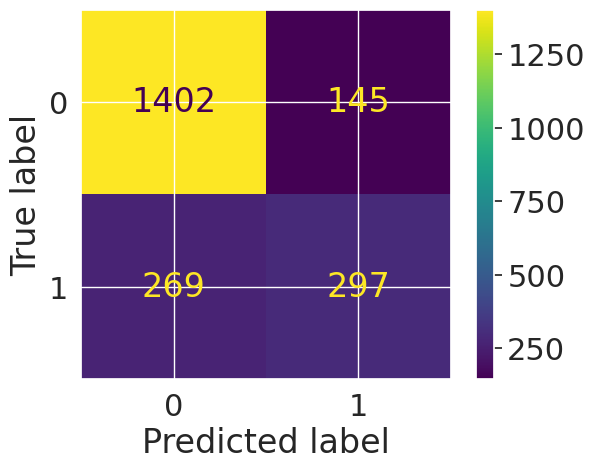

In [ ]:
#Now we will plot the confusion matrix display of the model
cm = confusion_matrix(y_test, lr_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [ ]:
#We are also gonna print the classification report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1547
           1       0.67      0.52      0.59       566

    accuracy                           0.80      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



In [ ]:
# F1_Score for the logistic regression
f1_score_lr = f1_score(y_test, lr_pred, average='weighted')
print(f1_score_lr)

0.7957937042745873


In [ ]:
# Recall for Logistic regression
recall_lr = recall_score(y_test, lr_pred, average='weighted')
print(recall_lr)

0.804070042593469


## Decision Tree Classifier

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
dtc_acc = round(accuracy_score(y_test, dtc_pred)*100,ndigits=2)
print(f'The score of Decision Tree Classifier model is {round(accuracy_score(y_test, dtc_pred)*100,ndigits=2)}%')

The score of Decision Tree Classifier model is 72.46%


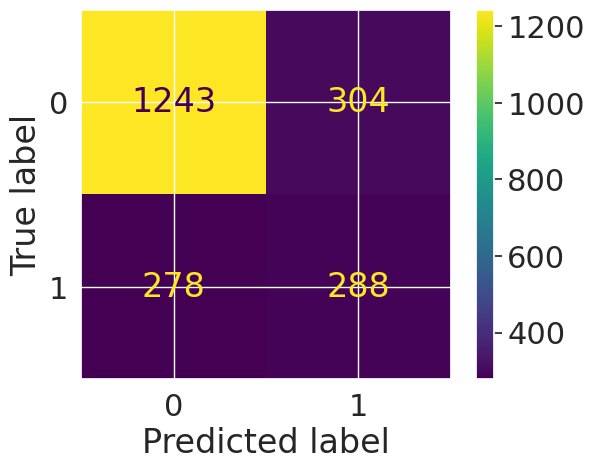

In [ ]:
#Now we will plot the confusion matrix display of the model
cm = confusion_matrix(y_test, dtc_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [ ]:
#We are also gonna print the classification report
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1547
           1       0.49      0.51      0.50       566

    accuracy                           0.72      2113
   macro avg       0.65      0.66      0.65      2113
weighted avg       0.73      0.72      0.73      2113



In [ ]:
# F1_Score for the Decision tree classifier
f1_score_dtc = f1_score(y_test, dtc_pred, average='weighted')
print(f1_score_dtc)

0.7264872584295133


In [ ]:
# Recall for the Decision tree classifier
recall_dtc = recall_score(y_test, dtc_pred, average='weighted')
print(recall_dtc)

0.7245622337908187


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)
rfc_pred=model_rf.predict(X_test)
rfc_acc = round(accuracy_score(y_test, rfc_pred)*100,ndigits=2)
print(f'The score of Decision Tree Classifier model is {round(accuracy_score(y_test, rfc_pred)*100,ndigits=2)}%')

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



The score of Decision Tree Classifier model is 79.22%


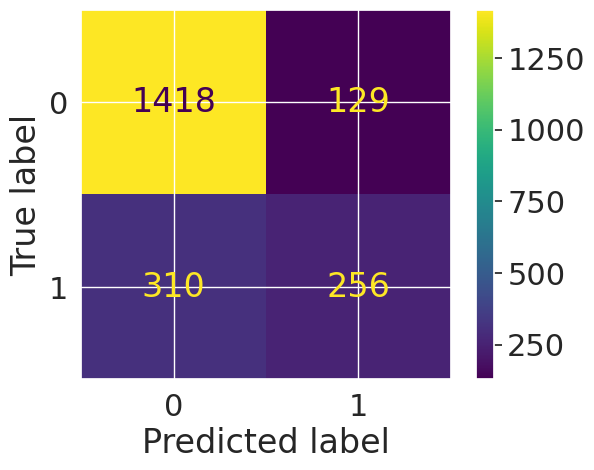

In [ ]:
#Now we will plot the confusion matrix display of the model
cm = confusion_matrix(y_test, rfc_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [ ]:
#We are also gonna print the classification report
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1547
           1       0.66      0.45      0.54       566

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [ ]:
# F1_Score for the Random Forest Classifer
f1_score_rfc = f1_score(y_test, rfc_pred, average='weighted')
print(f1_score_rfc)

0.7782085158727968


In [ ]:
# Recall for the Random Forest Classifer
recall_rfc = recall_score(y_test, rfc_pred, average='weighted')
print(recall_rfc)

0.792238523426408


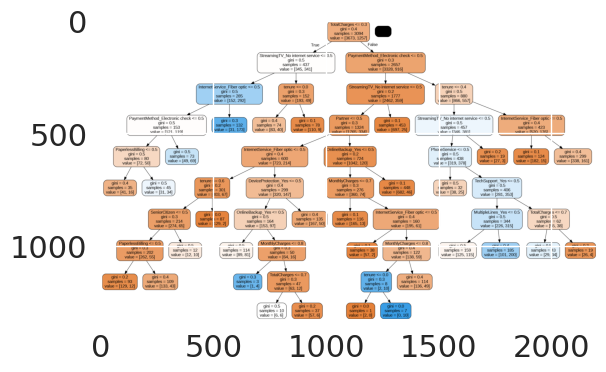

In [ ]:
from sklearn.tree import export_graphviz
import matplotlib.image as mpimg
import pydot
# Visualization of Nodes for the purpose of explainability
#figure(figsize=(32, 24), dpi=80)
tree_model = model_rf.estimators_[0]
export_graphviz(
    tree_model,
    out_file="tree.dot",
    feature_names=list(X_train.columns),
    rounded=True,
    precision=1,filled=True
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

# Balancing

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X_over,y_over,test_size=0.2,random_state=10)

In [ ]:
X_test.shape,y_test.shape

((2113, 30), (2113,))

In [ ]:
X_test_over.shape,y_test_over.shape

((2070, 30), (2070,))

In [ ]:
dtco=DecisionTreeClassifier()
dtco.fit(X_train_over,y_train_over)
dtco_pred=dtco.predict(X_test_over)
dtco_acc = round(accuracy_score(y_test_over, dtco_pred)*100,ndigits=2)
print(f'The score of Decision Tree Classifier model is {round(accuracy_score(y_test_over, dtco_pred)*100,ndigits=2)}%')

The score of Decision Tree Classifier model is 86.38%


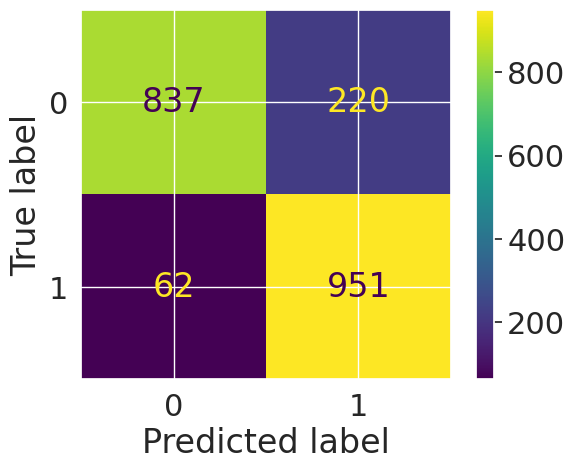

In [ ]:
#Now we will plot the confusion matrix display of the model
cm = confusion_matrix(y_test_over, dtco_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [ ]:
#We are also gonna print the classification report
print(classification_report(y_test_over, dtco_pred))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1057
           1       0.81      0.94      0.87      1013

    accuracy                           0.86      2070
   macro avg       0.87      0.87      0.86      2070
weighted avg       0.87      0.86      0.86      2070



In [ ]:
rfco = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfco.fit(X_train_over,y_train_over)
rfco_pred=rfco.predict(X_test_over)
rfco_acc = round(accuracy_score(y_test_over, rfco_pred)*100,ndigits=2)
print(f'The score of Decision Tree Classifier model is {round(accuracy_score(y_test_over, rfco_pred)*100,ndigits=2)}%')

The score of Decision Tree Classifier model is 90.39%


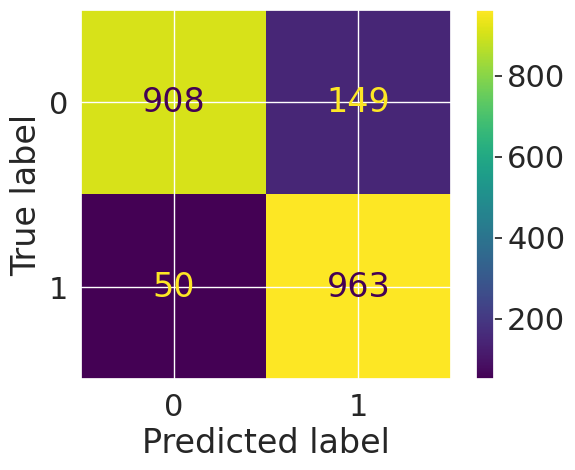

In [ ]:
#Now we will plot the confusion matrix display of the model
cm = confusion_matrix(y_test_over, rfco_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [ ]:
#We are also gonna print the classification report
print(classification_report(y_test_over, rfco_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1057
           1       0.87      0.95      0.91      1013

    accuracy                           0.90      2070
   macro avg       0.91      0.90      0.90      2070
weighted avg       0.91      0.90      0.90      2070



In [ ]:
lro=LogisticRegression()
lro.fit(X_train_over,y_train_over)
lro_pred=lro.predict(X_test_over)
lro_acc=round(accuracy_score(y_test_over, lro_pred)*100,ndigits=2)
print(f'The score of Logistic Regression Balancing model is {round(accuracy_score(y_test_over, lro_pred)*100,ndigits=2)}%')

The score of Logistic Regression Balancing model is 77.54%


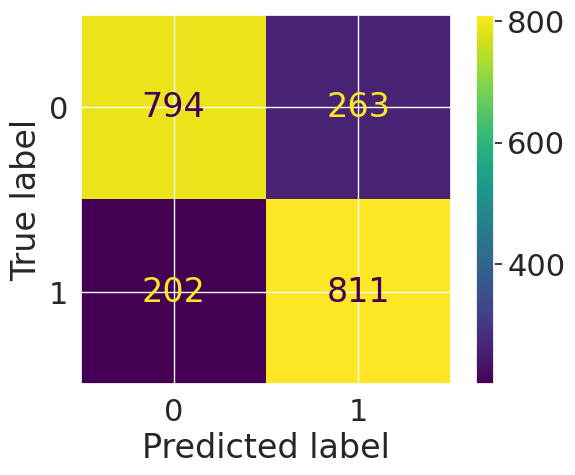

In [ ]:
#Now we will plot the confusion matrix display of the model
cm = confusion_matrix(y_test_over, lro_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [ ]:
#We are also gonna print the classification report
print(classification_report(y_test_over, lro_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1057
           1       0.76      0.80      0.78      1013

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



In [ ]:
# Accuracy of the models
results = pd.DataFrame([["Decision Tree Classifier", dtc_acc,f1_score_dtc,recall_dtc],
                        ["Random Forest Classifier", rfc_acc,f1_score_rfc,recall_rfc],
                        ["Logistic Regression",lr_acc,f1_score_lr,recall_lr]],
                        columns = ["Models", "Testing Accuracy Score","F1_Score","Recall"])

results.sort_values(by=['Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='YlOrRd')

## Metrics Evauation from the models

* Logistic Regression is having high accuracy comparing to other models before balancing technique.
* Also F1 Score  and Recall scores are highest for Logistic regression model.

In [ ]:
# Accuracy after Balancing technique has been applied
results = pd.DataFrame([["Decision Tree Classifier", dtco_acc],
                        ["Random Forest Classifier", rfco_acc],
                        ["Logistic Regression",lro_acc]],
                        columns = ["Models Balancing", "Testing Accuracy Score"])

results.sort_values(by=['Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='YlOrRd')

In [ ]:
# Remove 1% of the data randomly
data_1 = data_random.sample(frac=0.01)
data_1 = data_random.drop(data_1.index)

In [ ]:
# Remove 5% of the data randomly
data_5 = data_random.sample(frac=0.05)
data_5 = data_random.drop(data_5.index)

In [ ]:
# Remove 10% of the data randomly
data_10 = data_random.sample(frac=0.1)
data_10 = data_random.drop(data_10.index)

In [ ]:
# Checking dimensions of the data
print(data_1.shape)
print(data_5.shape)
print(data_10.shape)

(6973, 21)
(6691, 21)
(6339, 21)


In [ ]:
# Droped the respective column
data_1.drop("customerID",inplace=True,axis=1)
data_5.drop("customerID",inplace=True,axis=1)
data_10.drop("customerID",inplace=True,axis=1)

In [ ]:
# Converting Total Charges to a numerical data type.
data_1['TotalCharges'] = pd.to_numeric(data_1['TotalCharges'], errors='coerce')
data_5['TotalCharges'] = pd.to_numeric(data_5['TotalCharges'], errors='coerce')
data_10['TotalCharges'] = pd.to_numeric(data_10['TotalCharges'], errors='coerce')

In [ ]:
data_1_mean = data_1.copy()
data_5_mean = data_5.copy()
data_10_mean = data_10.copy()

In [ ]:
data_1_median = data_1.copy()
data_5_median = data_5.copy()
data_10_median = data_10.copy()

In [ ]:
# Impute missing values using mean imputation
data_1_mean = data_1['TotalCharges'].fillna(data_1['TotalCharges'].mean())
data_5_mean = data_5['TotalCharges'].fillna(data_5['TotalCharges'].mean())
data_10_mean = data_10['TotalCharges'].fillna(data_10['TotalCharges'].mean())

In [ ]:
# Impute missing values using median imputation
data_1_median = data_1['TotalCharges'].fillna(data_1['TotalCharges'].median())
data_5_median = data_1['TotalCharges'].fillna(data_1['TotalCharges'].median())
data_10_median = data_1['TotalCharges'].fillna(data_1['TotalCharges'].median())

In [ ]:
# Converting classfication string columns to numeric columns for processing the model
data_trans_1 = pd.get_dummies(data_1,columns=['gender','Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines','InternetService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Churn'],drop_first=True)

In [ ]:
# Converting classfication string columns to numeric columns for processing the model
data_trans_5 = pd.get_dummies(data_5,columns=['gender','Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines','InternetService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Churn'],drop_first=True)

In [ ]:
# Converting classfication string columns to numeric columns for processing the model
data_trans_10 = pd.get_dummies(data_10,columns=['gender','Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines','InternetService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','Churn'],drop_first=True)

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [ ]:
# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=10)
data_1_knn = imputer.fit_transform(data_trans_1)
data_5_knn = imputer.fit_transform(data_trans_5)
data_10_knn = imputer.fit_transform(data_trans_10)

In [ ]:
# Impute missing values using IterativeImputer
imp = IterativeImputer(BayesianRidge())
data_1_iterative = imp.fit_transform(data_trans_1)
data_5_iterative = imp.fit_transform(data_trans_5)
data_10_iterative = imp.fit_transform(data_trans_10)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Make predictions using the training set
y_pred = log_reg_model.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.19
Coefficient of determination: 0.05
R^2 score on tarining set = 0.04758609905541311


In [ ]:
# Make predictions using the testing set
y_pred = log_reg_model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.20
Coefficient of determination: 0.00
R^2 score on test set = 0.000936498546143083


# 1. What are the data types? (Only numeric and categorical)

**The Telco Customer Churn dataset contains both numeric and categorical data.**

* The Telco Customer Churn dataset contains both numeric and categorical data.

* Numeric data are variables that are measured on a numerical scale, such as "tenure" (the number of months the customer has been with the company), "MonthlyCharges" (the amount charged to the customer monthly), and "TotalCharges" (the total amount charged to the customer). These variables are quantitative in nature and can be measured and analyzed using statistical methods.

* Categorical data, on the other hand, are variables that take on a limited number of values or categories. Examples of categorical variables in this dataset include "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", and "PaymentMethod". These variables are qualitative in nature and are often represented by labels or text, rather than numbers.

* Both numeric and categorical data can be important for predicting customer churn, and different analytical techniques may be used for each type of data. For example, regression analysis may be used for numeric data to identify which factors are most strongly associated with churn, while classification models wil be used for categorical data to understand which features are most predictive of churn.


# 2. Are there missing values?

* It appears that there are 11 missing values in the "TotalCharges" column of the Telco Customer Churn dataset. These missing values are represented as empty spaces in the dataset.

* Additionally, the "TotalCharges" column was originally intended to contain numeric data (specifically, floating-point values), but was instead stored as a text column (i.e., an "object" datatype) in the dataset. This may be because the missing values in the column were represented as blank spaces, which would not be possible if the column were stored as a numeric datatype.

* To address this issue, the "TotalCharges" column may need to be converted to a numeric datatype, such as float or integer, and the missing values will need to be handled. One common approach to handling missing values is to impute them with the mean or median value of the column, or to drop the rows or columns containing missing values. However, the specific approach taken will depend on the specific goals of the analysis and the characteristics of the dataset.

* Here i chose to impute mean values in the column



# 3. What are the likely distributions of the numeric variables?

* The numeric variables in the Telco Customer Churn dataset may not follow a normal distribution, as suggested by the Q-Q plot. Instead, they may be skewed to the left or right.

* The Tenure column was not skewed normally, which could suggest that the distribution of the data is not symmetrical. This could be due to factors such as customer retention strategies, pricing changes, or seasonal effects.

* The Monthly Charges column was right-skewed, which means that the majority of customers pay lower monthly charges, and there are a smaller number of customers paying higher monthly charges. This could be due to factors such as premium services, higher data usage, or a larger number of devices connected to the service.

* The Total Charges column was also right-skewed, which suggests that the majority of customers have lower total charges, while a smaller number of customers have higher total charges. This could be due to factors such as longer tenure, premium services, or higher data usage.

* It is worth noting that the presence of outliers in the predictor variables may affect the distribution of the data and could also impact the modeling process. Therefore, it may be necessary to take appropriate measures, such as transforming the data or removing the outliers, to ensure that the assumptions of the chosen statistical model are met.

# 4. Which independent variables are useful to predict a target (dependent variable)?


* The top predictor variables  that are useful to predict a dependent variable are.

  * Monthly Charges
  * PaperlessBilling
  * SeniorCitizen
  * PhoneService

# 5. Which independent variables have missing data? How much?

* The independent variable that has missing data in the Telco Customer Churn dataset is the "TotalCharges" variable, with 11 empty cells. The statement suggests that the missing values were imputed using the mean method in descriptive statistics rather than deleting the rows with missing data.

* Imputing missing values with the mean is a common approach for continuous data, as it provides a simple and efficient way to estimate the missing values based on the average of the observed values. However, it is important to consider the potential impact of imputing missing data on the analysis results and to evaluate whether other imputation methods or data cleaning techniques might be more appropriate.

* It is worth noting that imputing missing values can introduce bias into the data, especially if the missing values are not missing at random (i.e., there is a systematic reason for their absence). Therefore, it is important to carefully evaluate the assumptions and limitations of any imputation method and to consider the potential impact on the validity and reliability of the analysis results.

* I chose to impute the data rather than delete the rows in this case, and I used the descriptive statistics method to do so.

* Because the data was continuous, I chose to impute it using the mean method in descriptive statistics.

# 6. Do the training and test sets have the same data?

* No, the training and test sets for the Telco Customer Churn dataset should not have the same data. They should be different and independent of each other. The training set is used to train the model, while the test set is used to evaluate the performance of the model.


* For the Telco Customer Churn dataset, you can split the data into training and test sets, for example, 70-80% of the data for training and 30-20% for testing. Then use the training set to train the model, and use the test set to evaluate the performance of the model. The test set should be a representative sample of the population, and should be independent of the training set.

# 7. In the predictor variables independent of all the other predictor variables?

* The predictor variables in the Telco Customer Churn dataset are not completely independent of each other. This is supported by the correlation table, which shows that there is a correlation between many of the independent variables.

* This is not uncommon in real-world datasets, as many variables may be related to each other in some way. Correlation between variables can be positive (meaning that the variables tend to increase or decrease together) or negative (meaning that the variables tend to move in opposite directions).

* However, it is important to note that correlation does not necessarily imply causation. Just because two variables are correlated does not necessarily mean that one variable causes the other. Therefore, it is important to carefully consider the underlying relationships between the variables and to use appropriate statistical methods to test for causality and identify the most important predictors.

# 8. Which predictor variables are the most important?

1. MonthlyCharges
2. PaperlessBilling
3. SeniorCitizen
4. PhoneService
5. gender
6. Partner
7. Dependents
8. TotalCharges
9. tenure

# 9. Do the ranges of the predictor variables make sense?

Total 21 attributes -> 20 independent variables and 1 dependent variable

customerID, gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract,
PaperlessBilling, PaymentMethod and Churn is a classification data

MonthlyCharges, TotalCharges, tenure attributes are numeric data



# 10. What are the distributions of the predictor variables

* Numeric data variables are right skewed and having mesokurtic distribution.
* Since the numerical features are distributed over different value ranges.
* The Tenure column was not skewed normally, which could suggest that the distribution of the data is not symmetrical.
* The Monthly Charges column was right-skewed, which means that the majority of customers pay lower monthly charges, and there are a smaller number of customers paying higher monthly charges.
* The Total Charges column was also right-skewed, which suggests that the majority of customers have lower total charges, while a smaller number of customers have higher total charges.


# 11. Remove outliers and keep outliers (does if have an effect of the final predictive model)

* Removing outliers will helps the model to predict better, here there are 3 numberic attributes in which MonthlyCharges and tenure has outliers.

# 12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

* Randomly removed percentage of values and imputed the missing values with few imputation methods. Although it is a classification model we can have a glance on numeric data by checking residuals and checking bias and variance of the error.

* Imputing missing values is an important step in the data cleaning process, and there are several methods that can be used for imputation. In order to evaluate the performance of these methods, one approach is to randomly remove a percentage of the data and then impute the missing values using different methods. The resulting imputed values can then be compared to the true values to assess the accuracy of each method.

* To evaluate the performance of the imputation methods, we can calculate the percentage error on the residuals for the numeric data. This will give an indication of how well each method is able to recover the missing values. Additionally, we can check for bias and variance of the error to further evaluate the performance of each method.

* Some common imputation methods include mean imputation, median imputation, and regression imputation. Mean imputation replaces missing values with the mean of the non-missing values in that column. Median imputation replaces missing values with the median of the non-missing values in that column. Regression imputation uses a regression model to predict the missing values based on the other variables in the dataset.

* After randomly removing a percentage of the data and imputing the missing values using these methods, we can compare the imputed values to the true values to evaluate the performance of each method. We can calculate the percentage error on the residuals for each imputed value, and we can also check for bias and variance of the error.

* If the imputation methods are able to accurately recover the missing values, then the percentage error on the residuals should be low and the bias and variance of the error should be small. However, if the imputation methods are not able to accurately recover the missing values, then the percentage error on the residuals may be high and the bias and variance of the error may be large.

# Conclusion

As a result, for classification, to predict the target variable "Churn" the Logistic Model is the one having the best performance. VIF, p-values and other tests were considered to ignore for the independent variables because it has very less continuous variables in the dataset, so cannot expect best multicollinearity for the model.

Hence model deployement has been done and best accuracy has been generated for the Telco customer churn dataset with specific classfication models.

# References

https://analyticsindiamag.com/7-types-classification-algorithms/#:~:text=Classification%20model%3A%20A%20classification%20model,of%20a%20phenomenon%20being%20observed.

https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501

https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226

https://towardsdatascience.com/introduction-to-data-preprocessing-in-machine-learning-a9fa83a5dc9d

###Licences:

MIT License


Copyright (c) 2023 Rohit Kanithi


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:


The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.


THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE